In [1]:
import numpy as np ## numpy is a library for mathematical functions and numerics
import pandas as pd ## pandas is a library for working with data frames
import scanpy as sc ## scanpy allows us working with single-cell omics data. besca is built upon scanpy
import matplotlib.pyplot as plt ## matplotlib offers functions for visualizations
from scipy import sparse, io ## scipy provides algorithms for optimization, integration, and other numerical operations
import besca as bc ## besca enables reproducible single-cell analysis for translational studies
import seaborn as sns ## seaborn is a high-level plotting library
import os ## standard library to interact with the operational system
from IPython.display import HTML ## allow displaying HTML blocks

sc.logging.print_header() ## print software versions for logging

### set color for dotplots
mypal=sns.color_palette("light:#5A9", as_cmap=True)

scanpy==1.6.0 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.9.0 pandas==1.4.3 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11


In [2]:
def mybarplot(df, avg, cat1, cat2=None, subset='', width=4, height=4, mplots=False):
    ### Nested barplot using seaborn
    ### df is the pd with the values, avg string 'Avg' or 'Fct' 
    ### cat1 is major split (e.g. cell types), cat2 minor split (e.g. days/response)   
    if cat2==None:
        mydim=len(set(df[cat1]))
        g=sns.catplot(x=cat1, y=avg, data=df, kind="bar", height=height, 
                        aspect=np.max([1,mydim/width]),palette=sequential_colors)
    else:
        mydim=len(set(df[cat1]))*len(set(df[cat2]))
        g = sns.catplot(x=cat1, y=avg, hue=cat2, data=df, height=height, kind="bar",
                        aspect=np.max([1,mydim/width]),palette=sequential_colors)
    g.despine(left=True)
    g.set_ylabels(avg+" expression")
    g.fig.suptitle(myg)
    g.set_xticklabels(rotation=90)
    if cat2==None: cat2=''
    if mplots==True:
        g.savefig(prevfolder+'Prev-'+title+'-'+myg+'-barplot-'+avg+'-'+cat1+cat2+subset+'.png') 
    
def prepare_df(myg, adata, cond1, cond2, cond3):
    myit1=np.sort(list(set(adata.obs[cond1])))
    myit2=np.sort(list(set(adata.obs[cond2])))
    df=pd.DataFrame()
    for i in myit1:
        cdata=adata[adata.obs[cond1]==i].copy()
        myit3=np.sort(list(set(cdata.obs[cond3])))
        for j in myit3:
            data=cdata[cdata.obs[cond3]==j].copy()
            average_obs,fraction_obs=bc.get_means(data,cond2)
            mylen=len(fraction_obs[myg])
            df1=pd.DataFrame(data={'Avg':average_obs[myg],'Fct': fraction_obs[myg],
                                   cond1: [i]*mylen,cond3: [j]*mylen,
                                   cond2: fraction_obs[myg].index})
            df=pd.concat([df,df1],ignore_index=True)
    return df    

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sequential_colors = sns.color_palette("GnBu_d", 10)
sns.set(style="whitegrid") # palette="GnBu_d"
cmap = 'viridis'

# Define folder - notebook location
root_path = os.getcwd()
prevfolder = os.path.join(root_path, 'plots/') # Directory where plots will be saved
mplots = True # Set to True in order to export the plots

# Define the folder for plots 
sc.set_figure_params()
sc.settings.figdir = prevfolder

In [5]:
ROSS_SERVER =  '' ## Roche server
condition = 'dblabel' # 'dblabel' is a controlled vocabulary of cell types, which are labels stored in our database, hence the name `dblabel`
cond2 = condition # this is used as major split -- e.g. cell types
min_cells = 10 # Minimum number of cells per celltype. Only celltypes with a number above the threshold will be plotted

In [6]:
## If single gene 
## myg_geneID_orig='MAP4K1'

# If multiple genes use:
myg_geneID_orig=['FOXP3', 'PDCD1'] ## other options: ['EPCAM', 'CEACAM5', 'FAP', 'PTPRC']

# We use two dictionaries to store the results of the two genes in which we are interested in
summarydf={}
summarydf2={}

# Cutoffs for dotplots 
dmax=0.3; vmax=0.6
dmaxb=dmax*2; vmaxb=vmax*2

In [7]:
url = ROSS_SERVER + '/scseq/Smillie2019_human_IBD/analyzed/standard_2_7_incl_batch/adata_celltype_annotation_extended.h5ad'
filename = 'Colon_healthy_inflamed.h5ad'

adata = sc.read(filename, backup_url=url)

cond1='Health' ### this is used to partition (e.g. days/treaments/categories)
cond3='Subject' ### this is used as replicates
cond2=condition='Cluster'
title="Colon_healthy_inflamed"

### List of cell types that we identified with RanForrest classifier

In [9]:
cell_list=['transit amplifying cell',                 
          'proliferating transit amplifying cell',
          'enterocyte',
          'immature goblet cell',
          'macrophage',
          'fibroblast',
          'plasma cell',
          'CD8-positive, alpha-beta T cell',
          'activated CD4-positive, alpha-beta T cell',
          'CD1c-positive myeloid dendritic cell']
# print(cell_list[0])
# print(cell_list[1])
# print(cell_list[2])

### Differential expression analysis and visualization of marker genes with heatmaps

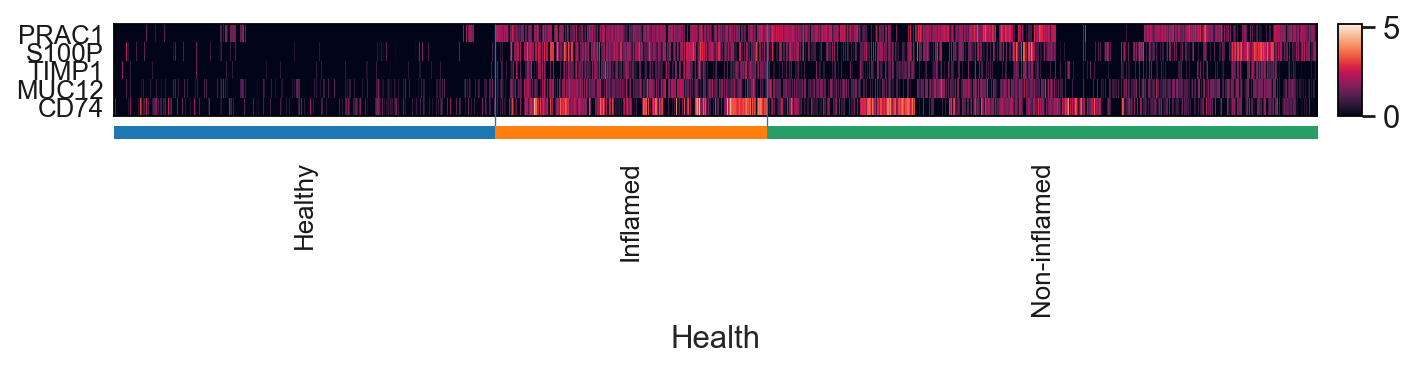

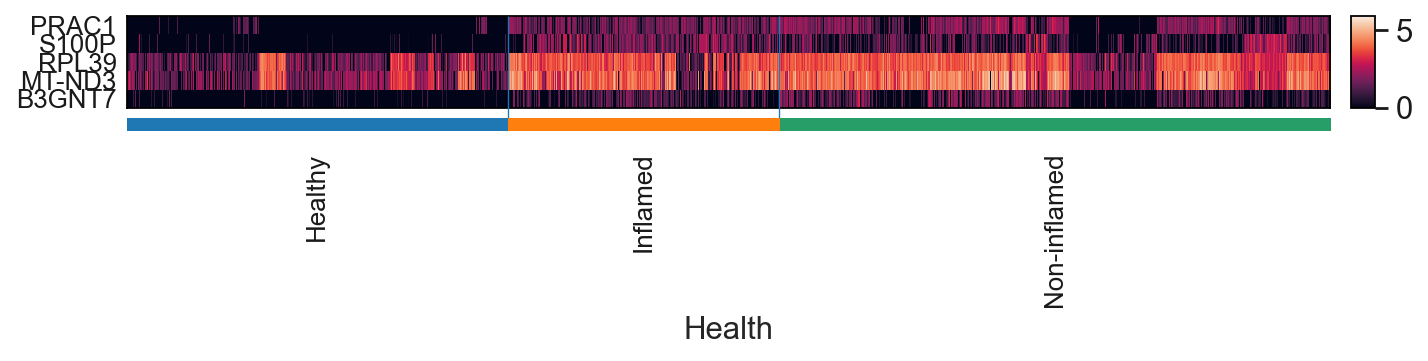

0


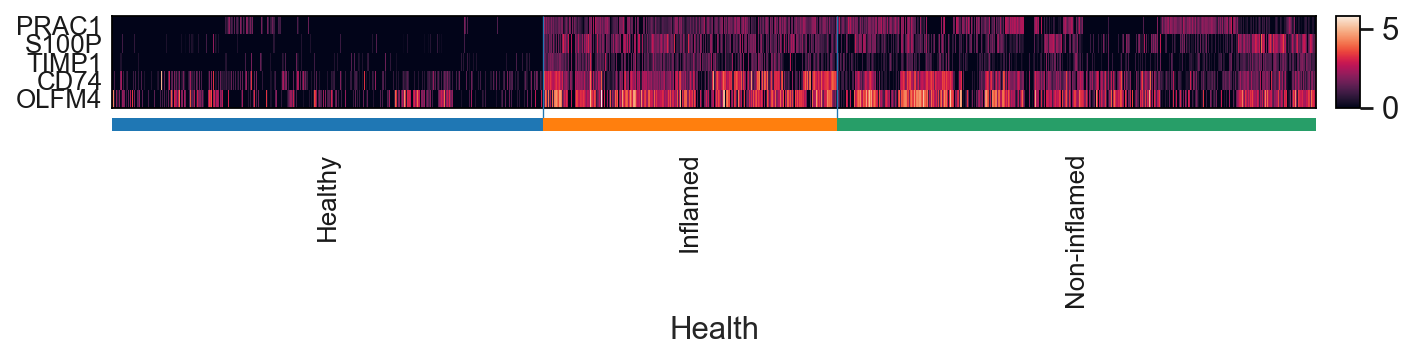

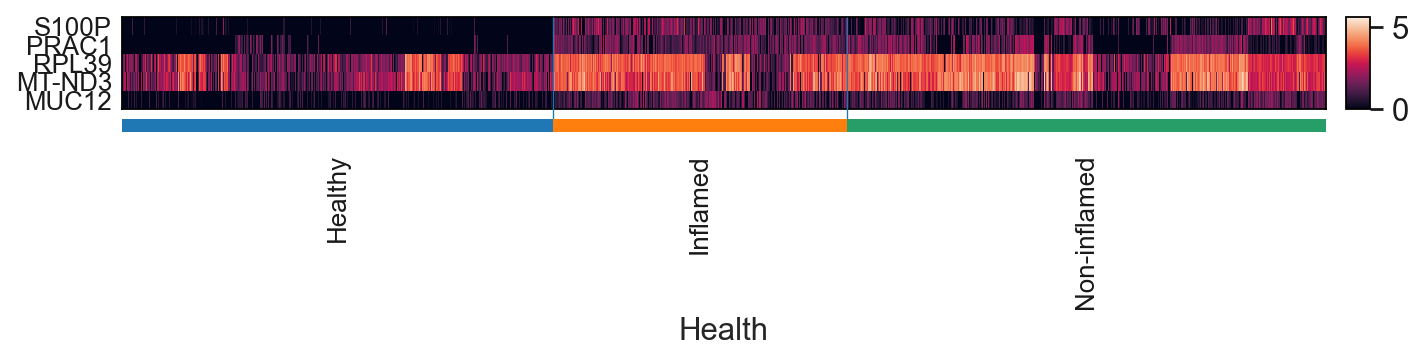

1


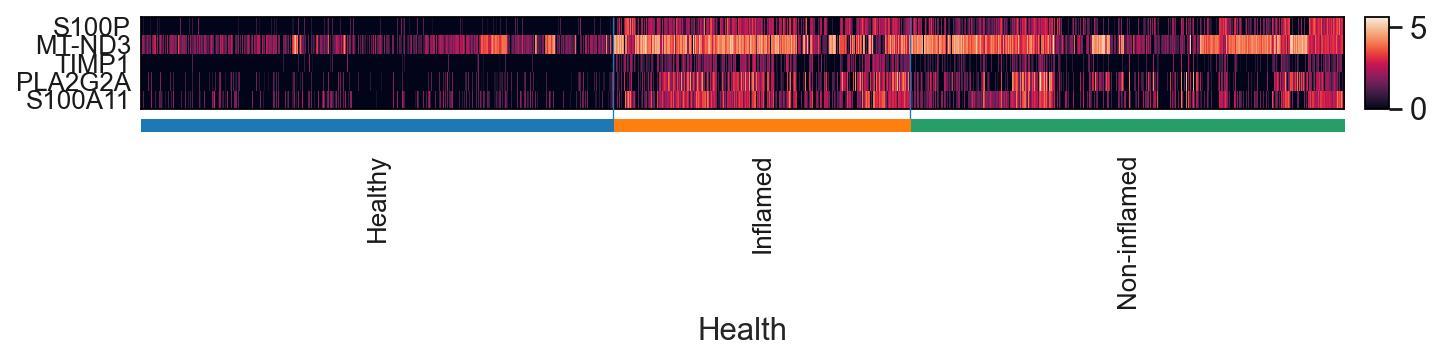

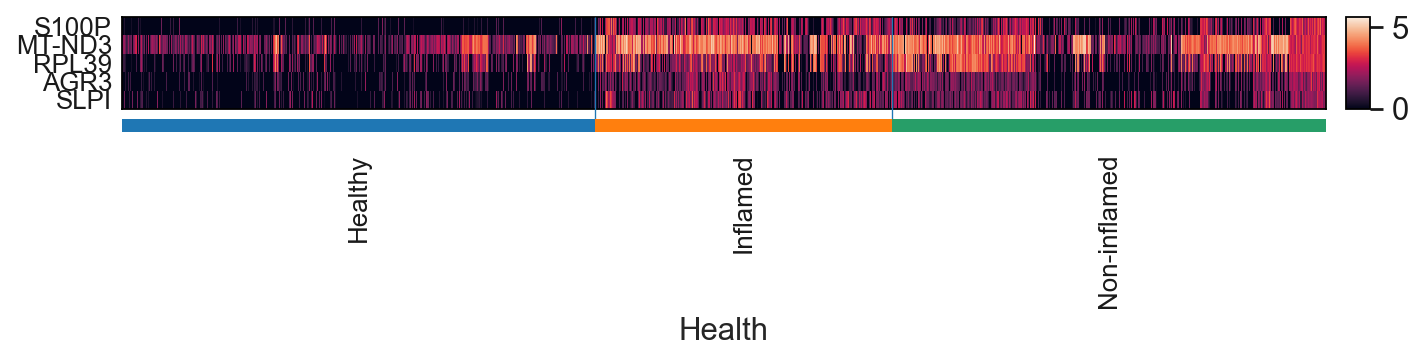

2


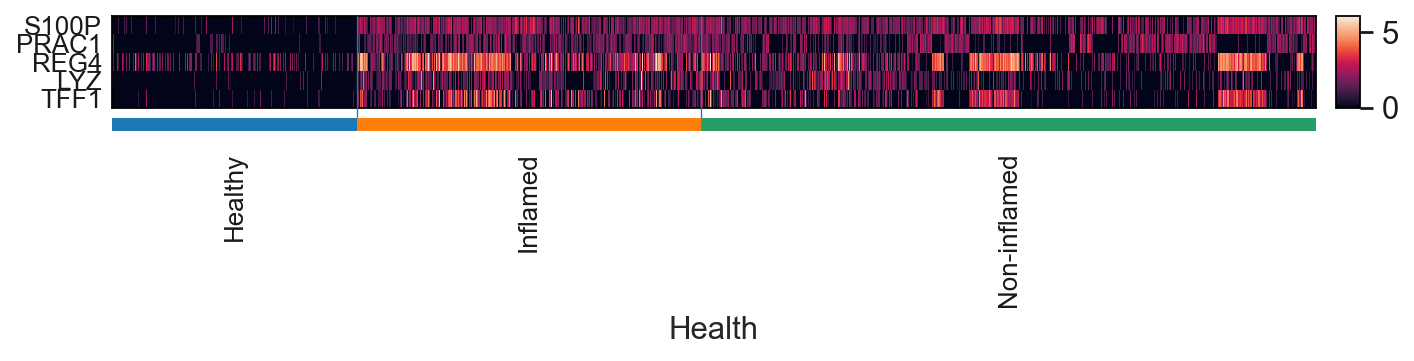

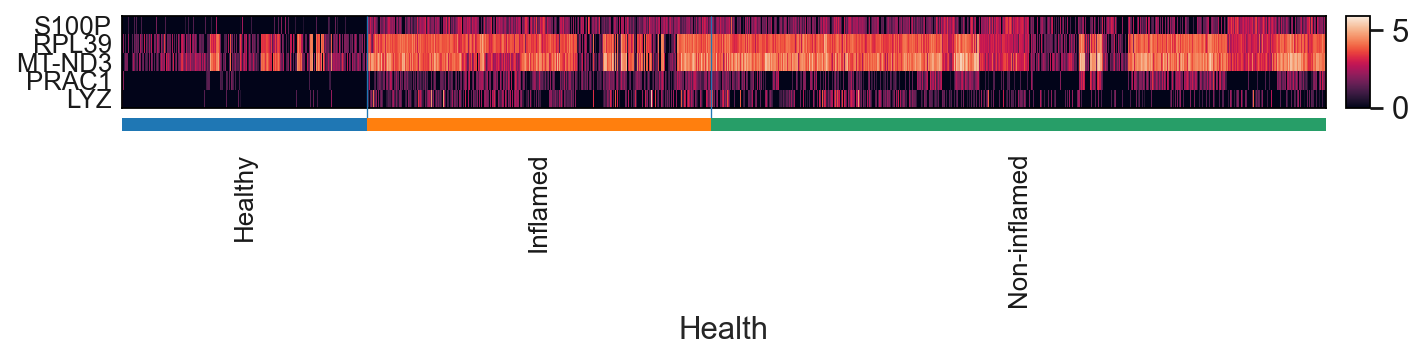

3


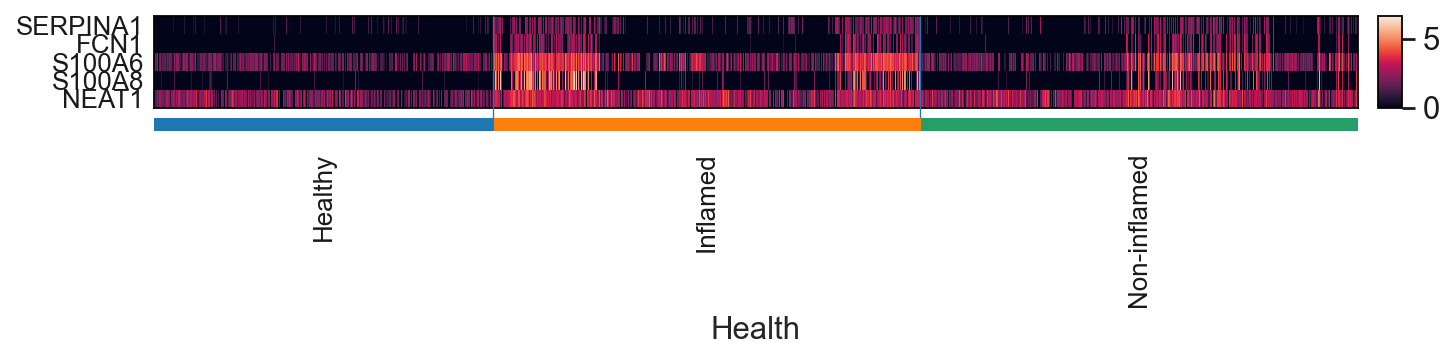

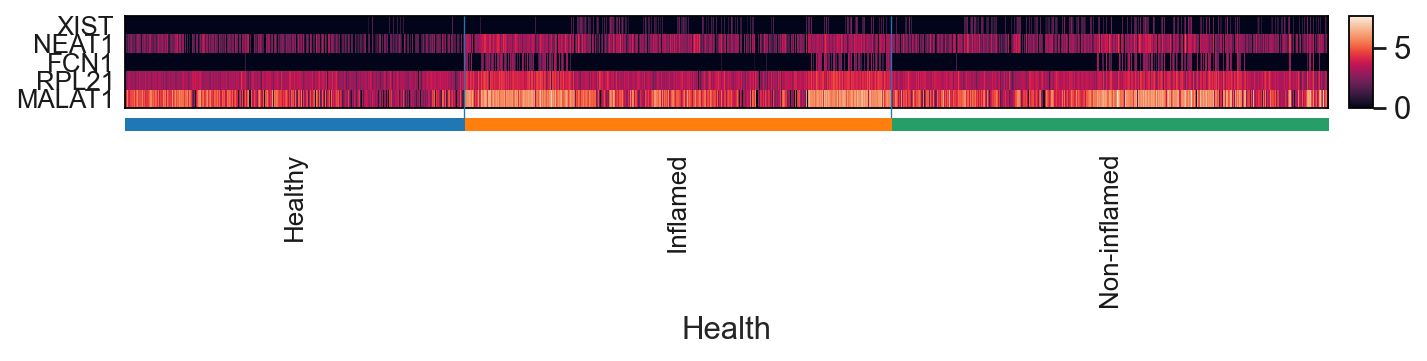

4


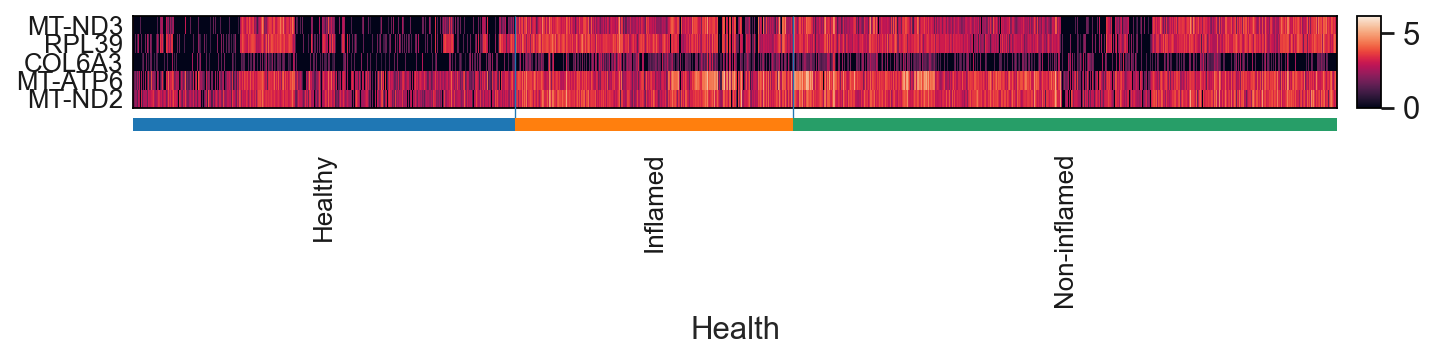

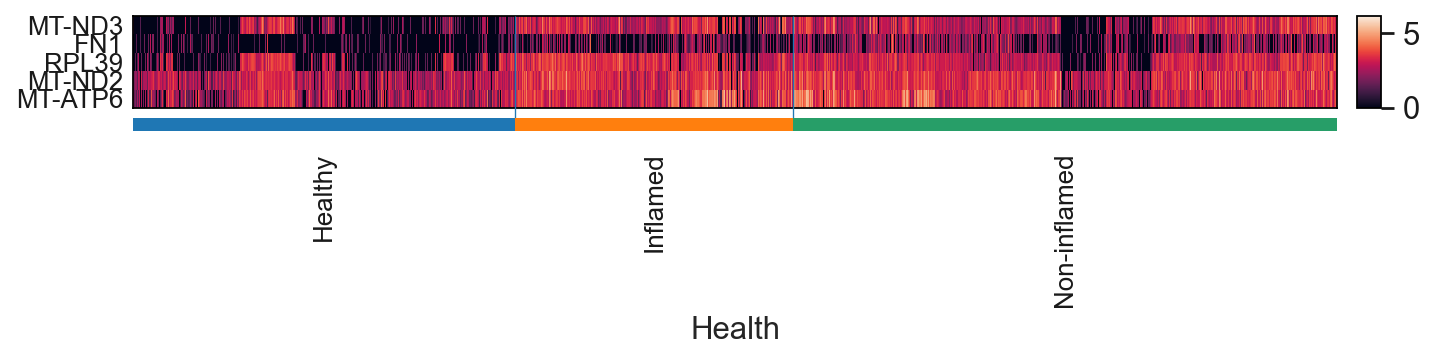

5


In [10]:
import matplotlib.pyplot as plt
InfoDF = pd.DataFrame()

for i in range(6):  #Analysis and plots run for the top 5 cell types identified with the classifier
    data_subset = adata[adata.obs['dblabel'].isin([str(cell_list[i])])]
    subtitle=list(data_subset.obs['dblabel'].unique())


    # Run differential expression (DE) keeping Healthy always as control reference
    sc.tl.rank_genes_groups(data_subset, groupby = 'Health', method='t-test', reference= 'Healthy')  #method: t-test
#     sc.tl.rank_genes_groups(data_subset, groupby = 'Health', method='wilcoxon', reference= 'Healthy')  #method: wilcoxon


    # Take DE data from the object and see it as a table
    result = data_subset.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    lfc = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges', 'pvals']})
    
    markers=np.array(lfc[['Inflamed_n', 'Non-inflamed_n']].head(5))  #put markers genes (top5 DE) in an array
    
    ##Save the ranked marker genes for each cell type in a dataframe (InfoDF)
    tempDF = pd.DataFrame(lfc)
    tempDF.insert(0, "Cell type",str(subtitle[0]), True)
    InfoDF = pd.concat([InfoDF,tempDF])

    ##Make the heatmap plots of the marker genes based on health condition
    sc.pl.heatmap(data_subset, markers[:,0], groupby='Health', swap_axes=True,save='_'+'logreg_'+str(subtitle[0])+'_IFvsH.pdf')  
    sc.pl.heatmap(data_subset, markers[:,1], groupby='Health', swap_axes=True,save='_'+'logreg_'+str(subtitle[0])+'_NIFvsH.pdf') 

    print(i)


### Save the data frame as a .csv where marker genes are ranked by their DE for each cell type analysed

In [12]:
# InfoDF.to_csv('Info_DE_t-test_DE_genes.csv', index=False)
# InfoDF2 = pd.read_csv('Info_DE_t-test_DE_genes.csv')  #You can read in the .csv file into a data frame (InfoDF2)
print(InfoDF.head(10))

                 Cell type Inflamed_n  Inflamed_l  Inflamed_p Non-inflamed_n  \
0  transit amplifying cell      PRAC1    4.904725         0.0          PRAC1   
1  transit amplifying cell      S100P    5.989623         0.0          S100P   
2  transit amplifying cell      TIMP1    5.407072         0.0          RPL39   
3  transit amplifying cell      MUC12    3.130521         0.0         MT-ND3   
4  transit amplifying cell       CD74    3.579261         0.0         B3GNT7   
5  transit amplifying cell    PLA2G2A    2.967596         0.0         HOXB13   
6  transit amplifying cell      RPL39    2.366136         0.0          MUC12   
7  transit amplifying cell     HOXB13    5.064229         0.0           TPT1   
8  transit amplifying cell      OLFM4    3.393440         0.0          UQCRB   
9  transit amplifying cell     B3GNT7    3.845484         0.0           AGR3   

   Non-inflamed_l  Non-inflamed_p  
0        4.509120             0.0  
1        4.936376             0.0  
2        2.

### Print the cell type and top5 marker genes

In [24]:
IF_vs_H=list(InfoDF.loc[InfoDF['Cell type'] == cell_list[2]].Inflamed_n.head(5))
NIF_vs_H=list(InfoDF.loc[InfoDF['Cell type'] == cell_list[2]]['Non-inflamed_n'].head(5))

#Print the cell type and top5 marker genes of each cell type for Inflamed vs. Healthy and Non-inflamed vs. Healthy
print(cell_list[2])
print(IF_vs_H)
print(NIF_vs_H)

enterocyte
['S100P', 'MT-ND3', 'TIMP1', 'PLA2G2A', 'S100A11']
['S100P', 'MT-ND3', 'RPL39', 'AGR3', 'SLPI']


### Identifying the number of shared marker genes between Inflamed vs. Healthy and Non-inflamed vs. Healthy comparisons

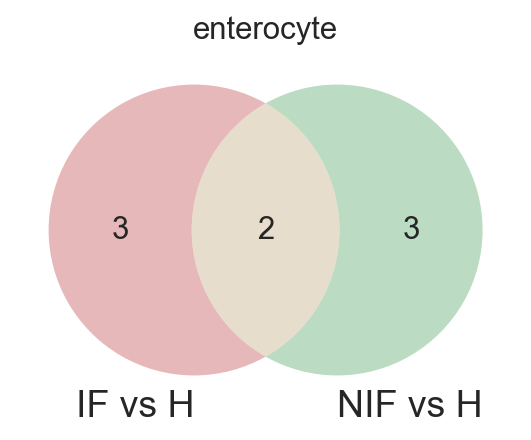

In [28]:
# venn_diagram(IF_vs_H,NIF_vs_H, c=None)
import matplotlib_venn
from matplotlib_venn import venn2

plt.figure(figsize=(4,4))
v = venn2([set(IF_vs_H), set(NIF_vs_H)], set_labels = ('IF vs H', 'NIF vs H'))
# venn2(IF_vs_H, NIF_vs_H )
# plt.show()
# plt.title(cell_list[0])
v=plt.title(str(cell_list[2]))
# v=plt.savefig("Cell5_Venn.pdf", format="pdf", bbox_inches="tight")